In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Load the data
data = pd.read_csv('pcd_dummy_data.csv')

In [ ]:
# Prepare the features and target
X = data[['Genotype', 'IF', 'EM', 'Ciliary beat frequency']].copy() 
y = data['Diagnosis'].copy()

# Encode categorical variables
le = LabelEncoder()
X['Genotype'] = le.fit_transform(X['Genotype'])
X['IF'] = le.fit_transform(X['IF'])
X['EM'] = le.fit_transform(X['EM'])
y = le.fit_transform(y)

# Convert to numeric dtype
X = X.astype('float64')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create and train the model
model = XGBClassifier(random_state=42,enable_categorical=True)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

# Plot precision-recall curve
plt.figure(figsize=(10, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall curve: AP={average_precision:.2f}')
plt.savefig('precision_recall_curve.png')
plt.close()

print("\nPrecision-Recall curve has been saved as 'precision_recall_curve.png'")

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        15
         PCD       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Precision-Recall curve has been saved as 'precision_recall_curve.png'


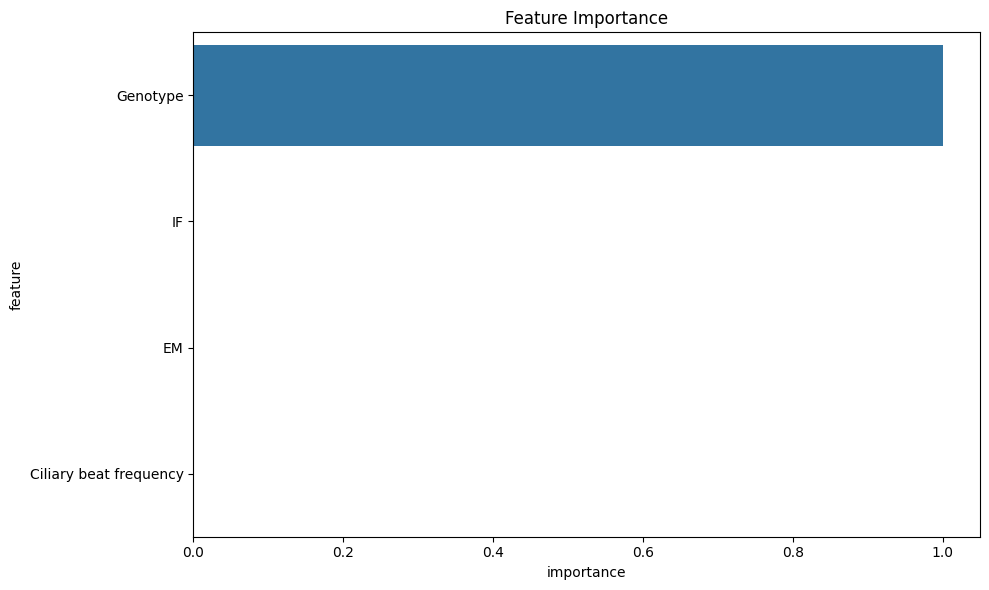


Feature Importance plot has been saved as 'feature_importance.png'


In [ ]:
# Feature importance
importance = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importance
}).sort_values('importance', ascending=False)

# Visualization: Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()
plt.close()

print("\nFeature Importance plot has been saved as 'feature_importance.png'")

In [ ]:
# Example prediction
example = X.iloc[0].values.reshape(1, -1)
prediction = model.predict(example)
print(f"\nExample prediction: {le.inverse_transform(prediction)[0]}")


Example prediction: Normal
